In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
sklearn.set_config(transform_output="default")

In [3]:
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')
val =  pd.read_csv('Data/val.csv')

In [4]:
train.head()

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-03-12,Banglore,New Delhi,05:45:00,20:20:00,875,1.0,No Info,13817
1,Jet Airways,2019-05-24,Kolkata,Banglore,21:10:00,10:05:00,775,1.0,In-flight meal not included,9663
2,Jet Airways,2019-05-18,Kolkata,Banglore,08:25:00,08:15:00,1430,1.0,In-flight meal not included,9663
3,Jet Airways,2019-05-15,Kolkata,Banglore,18:55:00,10:05:00,910,1.0,In-flight meal not included,9663
4,Jet Airways,2019-06-06,Delhi,Cochin,11:00:00,14:15:00,195,0.0,No Info,9564


In [5]:
train['dep_time']

0      05:45:00
1      21:10:00
2      08:25:00
3      18:55:00
4      11:00:00
         ...   
443    20:25:00
444    15:50:00
445    17:00:00
446    13:15:00
447    16:30:00
Name: dep_time, Length: 448, dtype: object

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          448 non-null    object 
 1   date_of_journey  448 non-null    object 
 2   source           448 non-null    object 
 3   destination      448 non-null    object 
 4   dep_time         448 non-null    object 
 5   arrival_time     448 non-null    object 
 6   duration         448 non-null    int64  
 7   total_stops      448 non-null    float64
 8   additional_info  448 non-null    object 
 9   price            448 non-null    int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 35.1+ KB


In [7]:
def get_data(data):
    X = data.drop(['price'],axis = 1)
    y = data['price']
    return X,y

In [8]:
X_train,y_train = get_data(train)

In [9]:
X_test,y_test = get_data(test)

In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          448 non-null    object 
 1   date_of_journey  448 non-null    object 
 2   source           448 non-null    object 
 3   destination      448 non-null    object 
 4   dep_time         448 non-null    object 
 5   arrival_time     448 non-null    object 
 6   duration         448 non-null    int64  
 7   total_stops      448 non-null    float64
 8   additional_info  448 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 31.6+ KB


In [11]:
numerical_cols = ['duration','total_stops']
datetime_cols = ['date_of_journey','dep_time','arrival_time']

categorical_cols = [col for col in X_train.columns if (col not in numerical_cols) and (col not in datetime_cols)]

In [12]:
categorical_cols

['airline', 'source', 'destination', 'additional_info']

In [13]:
X_train['date_of_journey'] = pd.to_datetime(X_train['date_of_journey'])
X_train['dep_time'] = pd.to_datetime(X_train['dep_time'],format = '%H:%M:%S').dt.time
X_train['arrival_time'] = pd.to_datetime(X_train['arrival_time'],format = '%H:%M:%S').dt.time

In [14]:
X_train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info
0,Jet Airways,2019-03-12,Banglore,New Delhi,05:45:00,20:20:00,875,1.0,No Info
1,Jet Airways,2019-05-24,Kolkata,Banglore,21:10:00,10:05:00,775,1.0,In-flight meal not included
2,Jet Airways,2019-05-18,Kolkata,Banglore,08:25:00,08:15:00,1430,1.0,In-flight meal not included
3,Jet Airways,2019-05-15,Kolkata,Banglore,18:55:00,10:05:00,910,1.0,In-flight meal not included
4,Jet Airways,2019-06-06,Delhi,Cochin,11:00:00,14:15:00,195,0.0,No Info
...,...,...,...,...,...,...,...,...,...
443,Jet Airways,2019-05-18,Kolkata,Banglore,20:25:00,19:10:00,1365,1.0,No Info
444,Goair,2019-03-09,Banglore,New Delhi,15:50:00,20:15:00,265,1.0,No Info
445,Jet Airways,2019-05-21,Kolkata,Banglore,17:00:00,18:00:00,1500,1.0,No Info
446,Spicejet,2019-05-01,Mumbai,Hyderabad,13:15:00,14:45:00,90,0.0,No Info


In [15]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          448 non-null    object        
 1   date_of_journey  448 non-null    datetime64[ns]
 2   source           448 non-null    object        
 3   destination      448 non-null    object        
 4   dep_time         448 non-null    object        
 5   arrival_time     448 non-null    object        
 6   duration         448 non-null    int64         
 7   total_stops      448 non-null    float64       
 8   additional_info  448 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 31.6+ KB


In [16]:
X_train.airline.unique().tolist()

['Jet Airways',
 'Air Asia',
 'Air India',
 'Goair',
 'Indigo',
 'Spicejet',
 'Vistara',
 'Multiple Carriers']

## Pipelines

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder

num_processor = Pipeline(steps = [
    ('scaler',StandardScaler())
])

cat_processor = Pipeline([
    ('ohe',OneHotEncoder(sparse_output = False,handle_unknown = 'ignore'))
])

In [18]:
from sklearn.compose import ColumnTransformer

trf = ColumnTransformer([
    ('num_processor',num_processor,numerical_cols),
    ('cat_processor',cat_processor,categorical_cols)
])

trf

ColumnTransformer(transformers=[('num_processor',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['duration', 'total_stops']),
                                ('cat_processor',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['airline', 'source', 'destination',
                                  'additional_info'])])

In [19]:
trf.fit_transform(X_train)

array([[ 0.54613636,  0.37118873,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.34374651,  0.37118873,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.66940004,  0.37118873,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.81107294,  0.37118873,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [-1.04262397, -1.15443102,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.81936266,  0.37118873,  0.        , ...,  1.        ,
         0.        ,  0.        ]])

## Model Selection

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import learning_curve
from xgboost import XGBRegressor



algorithms = {
	"Linear Regression": LinearRegression(),
	"Support Vector Machine": SVR(),
	"Random Forest": RandomForestRegressor(n_estimators=10),
	"XG Boost": XGBRegressor(n_estimators=10)
}

In [21]:
df = pd.concat([train,val],axis = 0)
X_,y_ = get_data(df)

In [22]:
def plot_curves(sizes, mean_scores, std_scores, label, ax):
	ax.plot(
		sizes,
		mean_scores,
		marker="o",
		label=label
	)

	ax.fill_between(
		x=sizes,
		y1=mean_scores - std_scores,
		y2=mean_scores + std_scores,
		alpha=0.5
	)

In [23]:
def plot_learning_curves(name, algorithm, figsize=(12, 4)):
    model = Pipeline(steps=[
        ("pre", trf),  # Assuming preprocessor is defined elsewhere
        ("alg", algorithm)
    ])

    train_sizes, train_scores, test_scores = learning_curve(
        estimator=model,
        X=X_,  # Assuming X_data is defined elsewhere
        y=y_,  # Assuming y_data is defined elsewhere
        cv=3,
        scoring="r2",
        n_jobs=-1,
        random_state=42
    )
    
    mean_train_scores = np.mean(train_scores, axis=1)
    std_train_scores = np.std(train_scores, axis=1)
    train_score = f"{mean_train_scores[-1]:.2f} +/- {std_train_scores[-1]:.2f}"

    mean_test_scores = np.mean(test_scores, axis=1)
    std_test_scores = np.std(test_scores, axis=1)
    test_score = f"{mean_test_scores[-1]:.2f} +/- {std_test_scores[-1]:.2f}"

    fig, ax = plt.subplots(figsize=figsize)

    # training curve
    plot_curves(
        train_sizes,
        mean_train_scores,
        std_train_scores,
        f"Train ({train_score})",
        ax
    )

    # test curve
    plot_curves(
        train_sizes,
        mean_test_scores,
        std_test_scores,
        f"Test ({test_score})",
        ax
    )

    ax.set_xlabel("Training Set Size")
    ax.set_ylabel("R-square")
    ax.set_title(name)
    ax.legend(loc="lower right")

    plt.show()


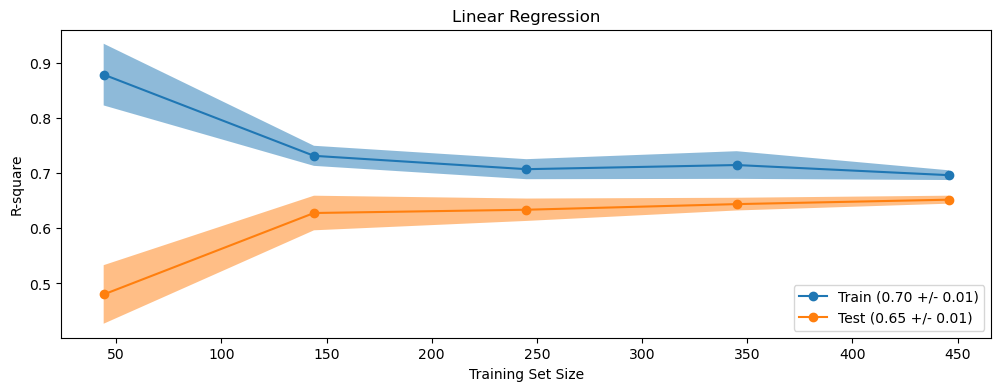

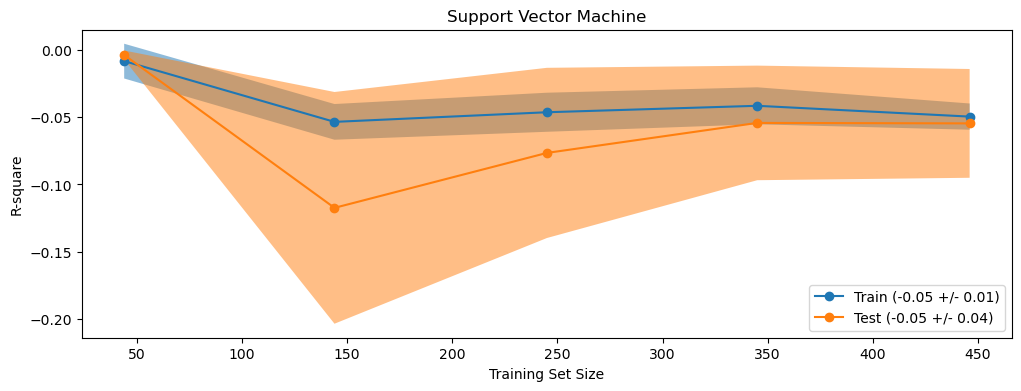

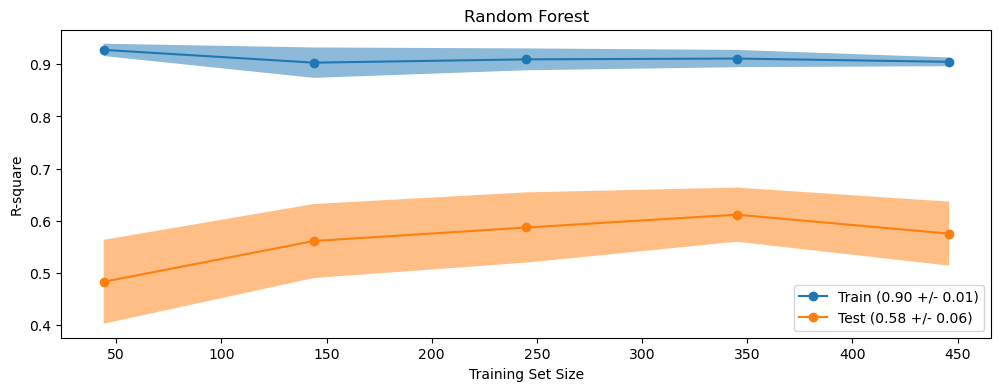

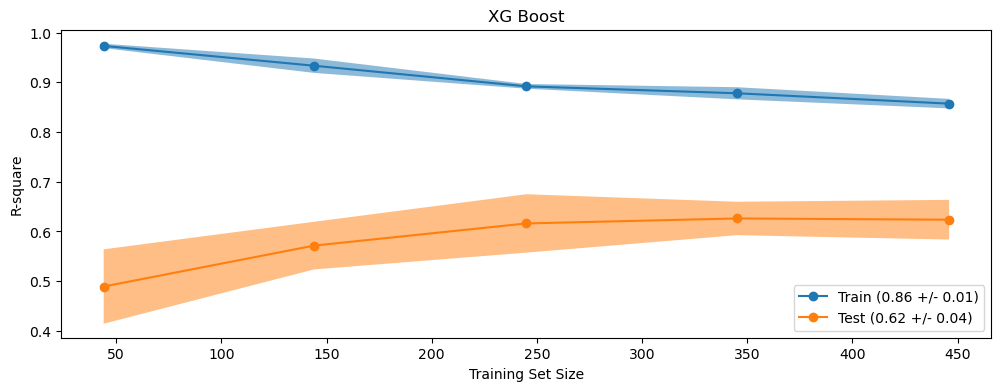

In [24]:
for name,algo in algorithms.items():
    plot_learning_curves(name,algo)

In [25]:
model = Pipeline(steps=[
	("pre", trf),
	("rf",  RandomForestRegressor(n_estimators=10))
])

In [26]:
model.fit(X_,y_)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num_processor',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['duration', 'total_stops']),
                                                 ('cat_processor',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['airline', 'source',
                                                   'destination',
                                                   'additional_info'])])),
                ('rf', RandomForestRegressor(n_estimators=10))])

In [27]:
def evaluate_model(X, y):
	y_pred = model.predict(X)
	return r2_score(y, y_pred)

In [28]:
evaluate_model(X_,y_)

0.8880724441296374

In [29]:
print(f"R2 score on Training data is = {evaluate_model(X_, y_)}")

R2 score on Training data is = 0.8880724441296374


In [30]:
print(f"R2 score on Test data is = {evaluate_model(X_test, y_test)}")

R2 score on Test data is = 0.4987708729625753


In [31]:
import joblib


joblib.dump(model, "model.joblib")

['model.joblib']

In [32]:
saved_model = joblib.load("model.joblib")
saved_model

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num_processor',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['duration', 'total_stops']),
                                                 ('cat_processor',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['airline', 'source',
                                                   'destination',
                                                   'additional_info'])])),
                ('rf', RandomForestRegressor(n_estimators=10))])

In [33]:
y_pred = saved_model.predict(X_test)

r2_score(y_test, y_pred)

0.4987708729625753

In [39]:
print(sklearn.__version__)
print(pd.__version__)
print(np.__version__)

1.5.1
2.2.2
1.26.4
